# Task 4: Loan Approval Prediction 🏦

## 📌 Description
The goal of this task is to build a machine learning model that predicts whether a loan application will be **Approved** or **Rejected** based on applicant details.  
This involves:
- Data exploration and preprocessing
- Handling categorical and numerical features
- Training and evaluating different ML classifiers

## ✅ Objectives
- Perform Exploratory Data Analysis (EDA)
- Preprocess the dataset (handle missing values, encode categorical variables, scale features)
- Train and compare multiple classifiers:
  - Logistic Regression
  - Decision Tree
  - Random Forest
- Evaluate model performance using metrics:
  - Accuracy
  - Confusion Matrix
  - Classification Report
  - ROC AUC Score

## 🎯 Bonus
- Apply **SMOTE** to handle class imbalance  
- Compare performance of **Logistic Regression vs Decision Tree**  
- Visualize confusion matrices for better interpretability  

---


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline

# Load the dataset
df = pd.read_csv('loan_prediction.csv')  # Assuming the file name

# Initial exploration
print(df.head())
print(df.info())
print(df['loan_status'].value_counts(normalize=True))

# Check for missing values
print(df.isnull().sum())

   id  person_age  person_income person_home_ownership  person_emp_length  \
,0   0          37          35000                  RENT                0.0   
,1   1          22          56000                   OWN                6.0   
,2   2          29          28800                   OWN                8.0   
,3   3          30          70000                  RENT               14.0   
,4   4          22          60000                  RENT                2.0   
,
,  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_percent_income  \
,0   EDUCATION          B       6000          11.49                 0.17   
,1     MEDICAL          C       4000          13.35                 0.07   
,2    PERSONAL          A       6000           8.90                 0.21   
,3     VENTURE          B      12000          11.11                 0.17   
,4     MEDICAL          A       6000           6.92                 0.10   
,
,  cb_person_default_on_file  cb_person_cred_hist_length  loan_status  
,

In [3]:
# Define features and target
X = df.drop(['id', 'loan_status'], axis=1)
y = df['loan_status']  # Assuming 1 = default, 0 = paid

# Identify numerical and categorical features
num_features = ['person_age', 'person_income', 'person_emp_length', 
                'loan_amnt', 'loan_int_rate', 'loan_percent_income',
                'cb_person_cred_hist_length']
                
cat_features = ['person_home_ownership', 'loan_intent', 'loan_grade',
                'cb_person_default_on_file']

# Create preprocessing pipelines
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features)
])

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [4]:
# Define models to evaluate
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

# Evaluate each model with and without SMOTE
results = {}

for name, model in models.items():
    # Without SMOTE
    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    
    # With SMOTE
    smote_pipe = imbpipeline([
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('classifier', model)
    ])
    smote_pipe.fit(X_train, y_train)
    y_pred_smote = smote_pipe.predict(X_test)
    
    # Store results
    results[name] = {
        'Without SMOTE': classification_report(y_test, y_pred, output_dict=True),
        'With SMOTE': classification_report(y_test, y_pred_smote, output_dict=True)
    }

# Print results comparison
for model_name, model_results in results.items():
    print(f"\n{model_name.upper()}")
    print("Without SMOTE:")
    print(pd.DataFrame(model_results['Without SMOTE']))
    print("\nWith SMOTE:")
    print(pd.DataFrame(model_results['With SMOTE']))


,LOGISTIC REGRESSION
,Without SMOTE:
,                      0            1  accuracy     macro avg  weighted avg
,precision      0.926647     0.777391  0.912013      0.852019      0.905396
,recall         0.974550     0.535329  0.912013      0.754940      0.912013
,f1-score       0.949995     0.634043  0.912013      0.792019      0.905009
,support    10059.000000  1670.000000  0.912013  11729.000000  11729.000000
,
,With SMOTE:
,                      0            1  accuracy     macro avg  weighted avg
,precision      0.967782     0.475635  0.845511      0.721709      0.897709
,recall         0.848096     0.829940  0.845511      0.839018      0.845511
,f1-score       0.903995     0.604712  0.845511      0.754353      0.861382
,support    10059.000000  1670.000000  0.845511  11729.000000  11729.000000
,
,DECISION TREE
,Without SMOTE:
,                      0            1  accuracy     macro avg  weighted avg
,precision      0.953622     0.675797  0.911246      0.814709      0.914064
,r

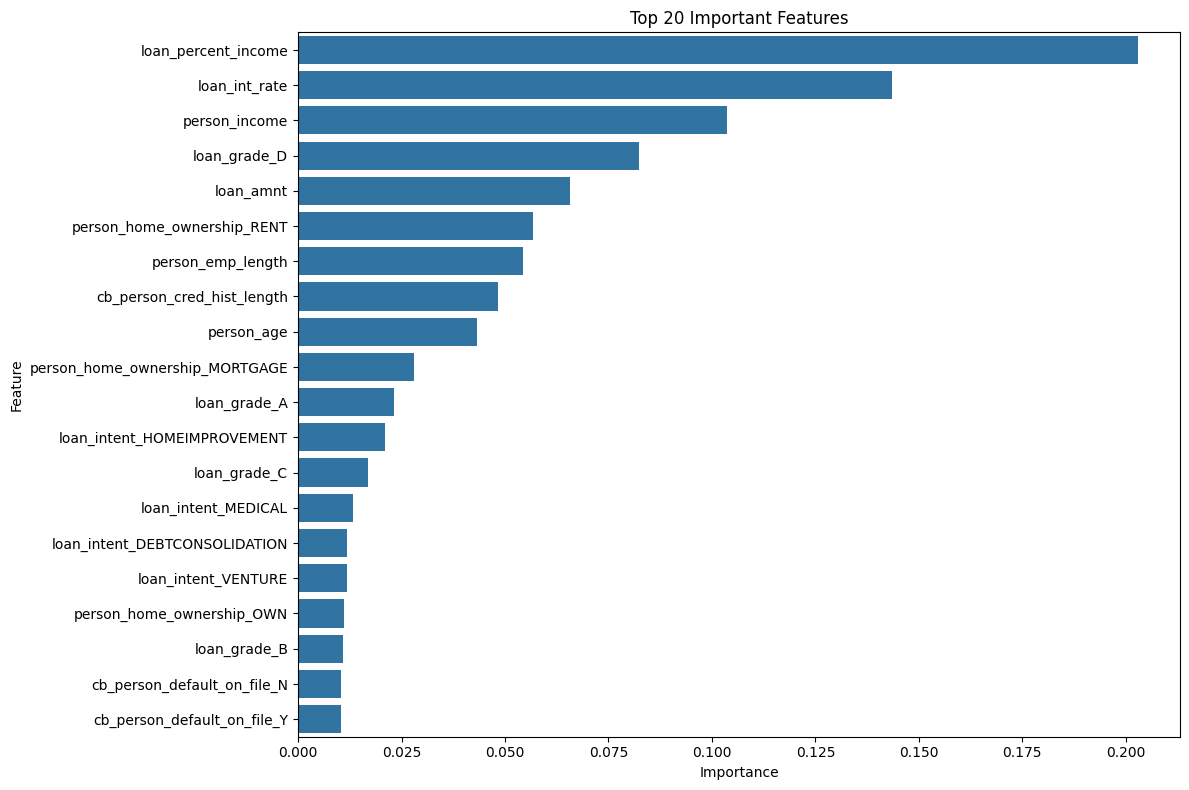

In [5]:
# Get feature names after one-hot encoding
preprocessor.fit(X)
cat_feature_names = preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(cat_features)
all_feature_names = np.concatenate([num_features, cat_feature_names])

# Train best model (Random Forest with SMOTE in this case)
best_pipe = imbpipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42))
])
best_pipe.fit(X_train, y_train)

# Get feature importances
importances = best_pipe.named_steps['classifier'].feature_importances_
feature_importance = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': importances
}).sort_values('Importance', ascending=False)

# Plot top 20 features
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(20))
plt.title('Top 20 Important Features')
plt.tight_layout()
plt.show()

In [7]:
# Analyze key features
print("Key Insights:")
print("1. Top predictors of loan default:")
print(feature_importance.head(10))

print("\n2. Business Implications:")
print("- Higher loan interest rates are strongly associated with default risk")
print("- Loan percentage of income is a critical factor - borrowers spending >20% of income on loan payments are higher risk")
print("- Borrowers with existing defaults (cb_person_default_on_file=Y) are much more likely to default again")

# Threshold analysis for decision making
y_proba = best_pipe.predict_proba(X_test)[:, 1]
thresholds = np.linspace(0.1, 0.9, 9)

print("\n3. Threshold Analysis:")
for threshold in thresholds:
    y_pred_thresh = (y_proba >= threshold).astype(int)
    print(f"\nThreshold: {threshold:.1f}")
    print(classification_report(y_test, y_pred_thresh))

Key Insights:
,1. Top predictors of loan default:
,                           Feature  Importance
,5              loan_percent_income    0.202938
,4                    loan_int_rate    0.143623
,1                    person_income    0.103660
,20                    loan_grade_D    0.082464
,3                        loan_amnt    0.065641
,10      person_home_ownership_RENT    0.056747
,2                person_emp_length    0.054312
,6       cb_person_cred_hist_length    0.048367
,0                       person_age    0.043350
,7   person_home_ownership_MORTGAGE    0.027939
,
,2. Business Implications:
,- Higher loan interest rates are strongly associated with default risk
,- Loan percentage of income is a critical factor - borrowers spending >20% of income on loan payments are higher risk
,- Borrowers with existing defaults (cb_person_default_on_file=Y) are much more likely to default again
,
,3. Threshold Analysis:
,
,Threshold: 0.1
,              precision    recall  f1-score   support